# 1. Load library

In [ ]:
# Xử lý dữ liệu
import numpy as np
import pandas as pd

# Trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# LightGBM
import lightgbm as lgb

# Tiền xử lý và đánh giá
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report


# 2. Load dataset

In [2]:
train_df = pd.read_csv("./dataset/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [3]:
test_df = pd.read_csv("./dataset/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


# 3. Data preprocessing

## 3.1 Data cleaning

In [4]:
train_df.isnull().sum() #there's no null value

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [6]:
train_df['CustomerID'].nunique()

243787

## 3.2 Data exploration

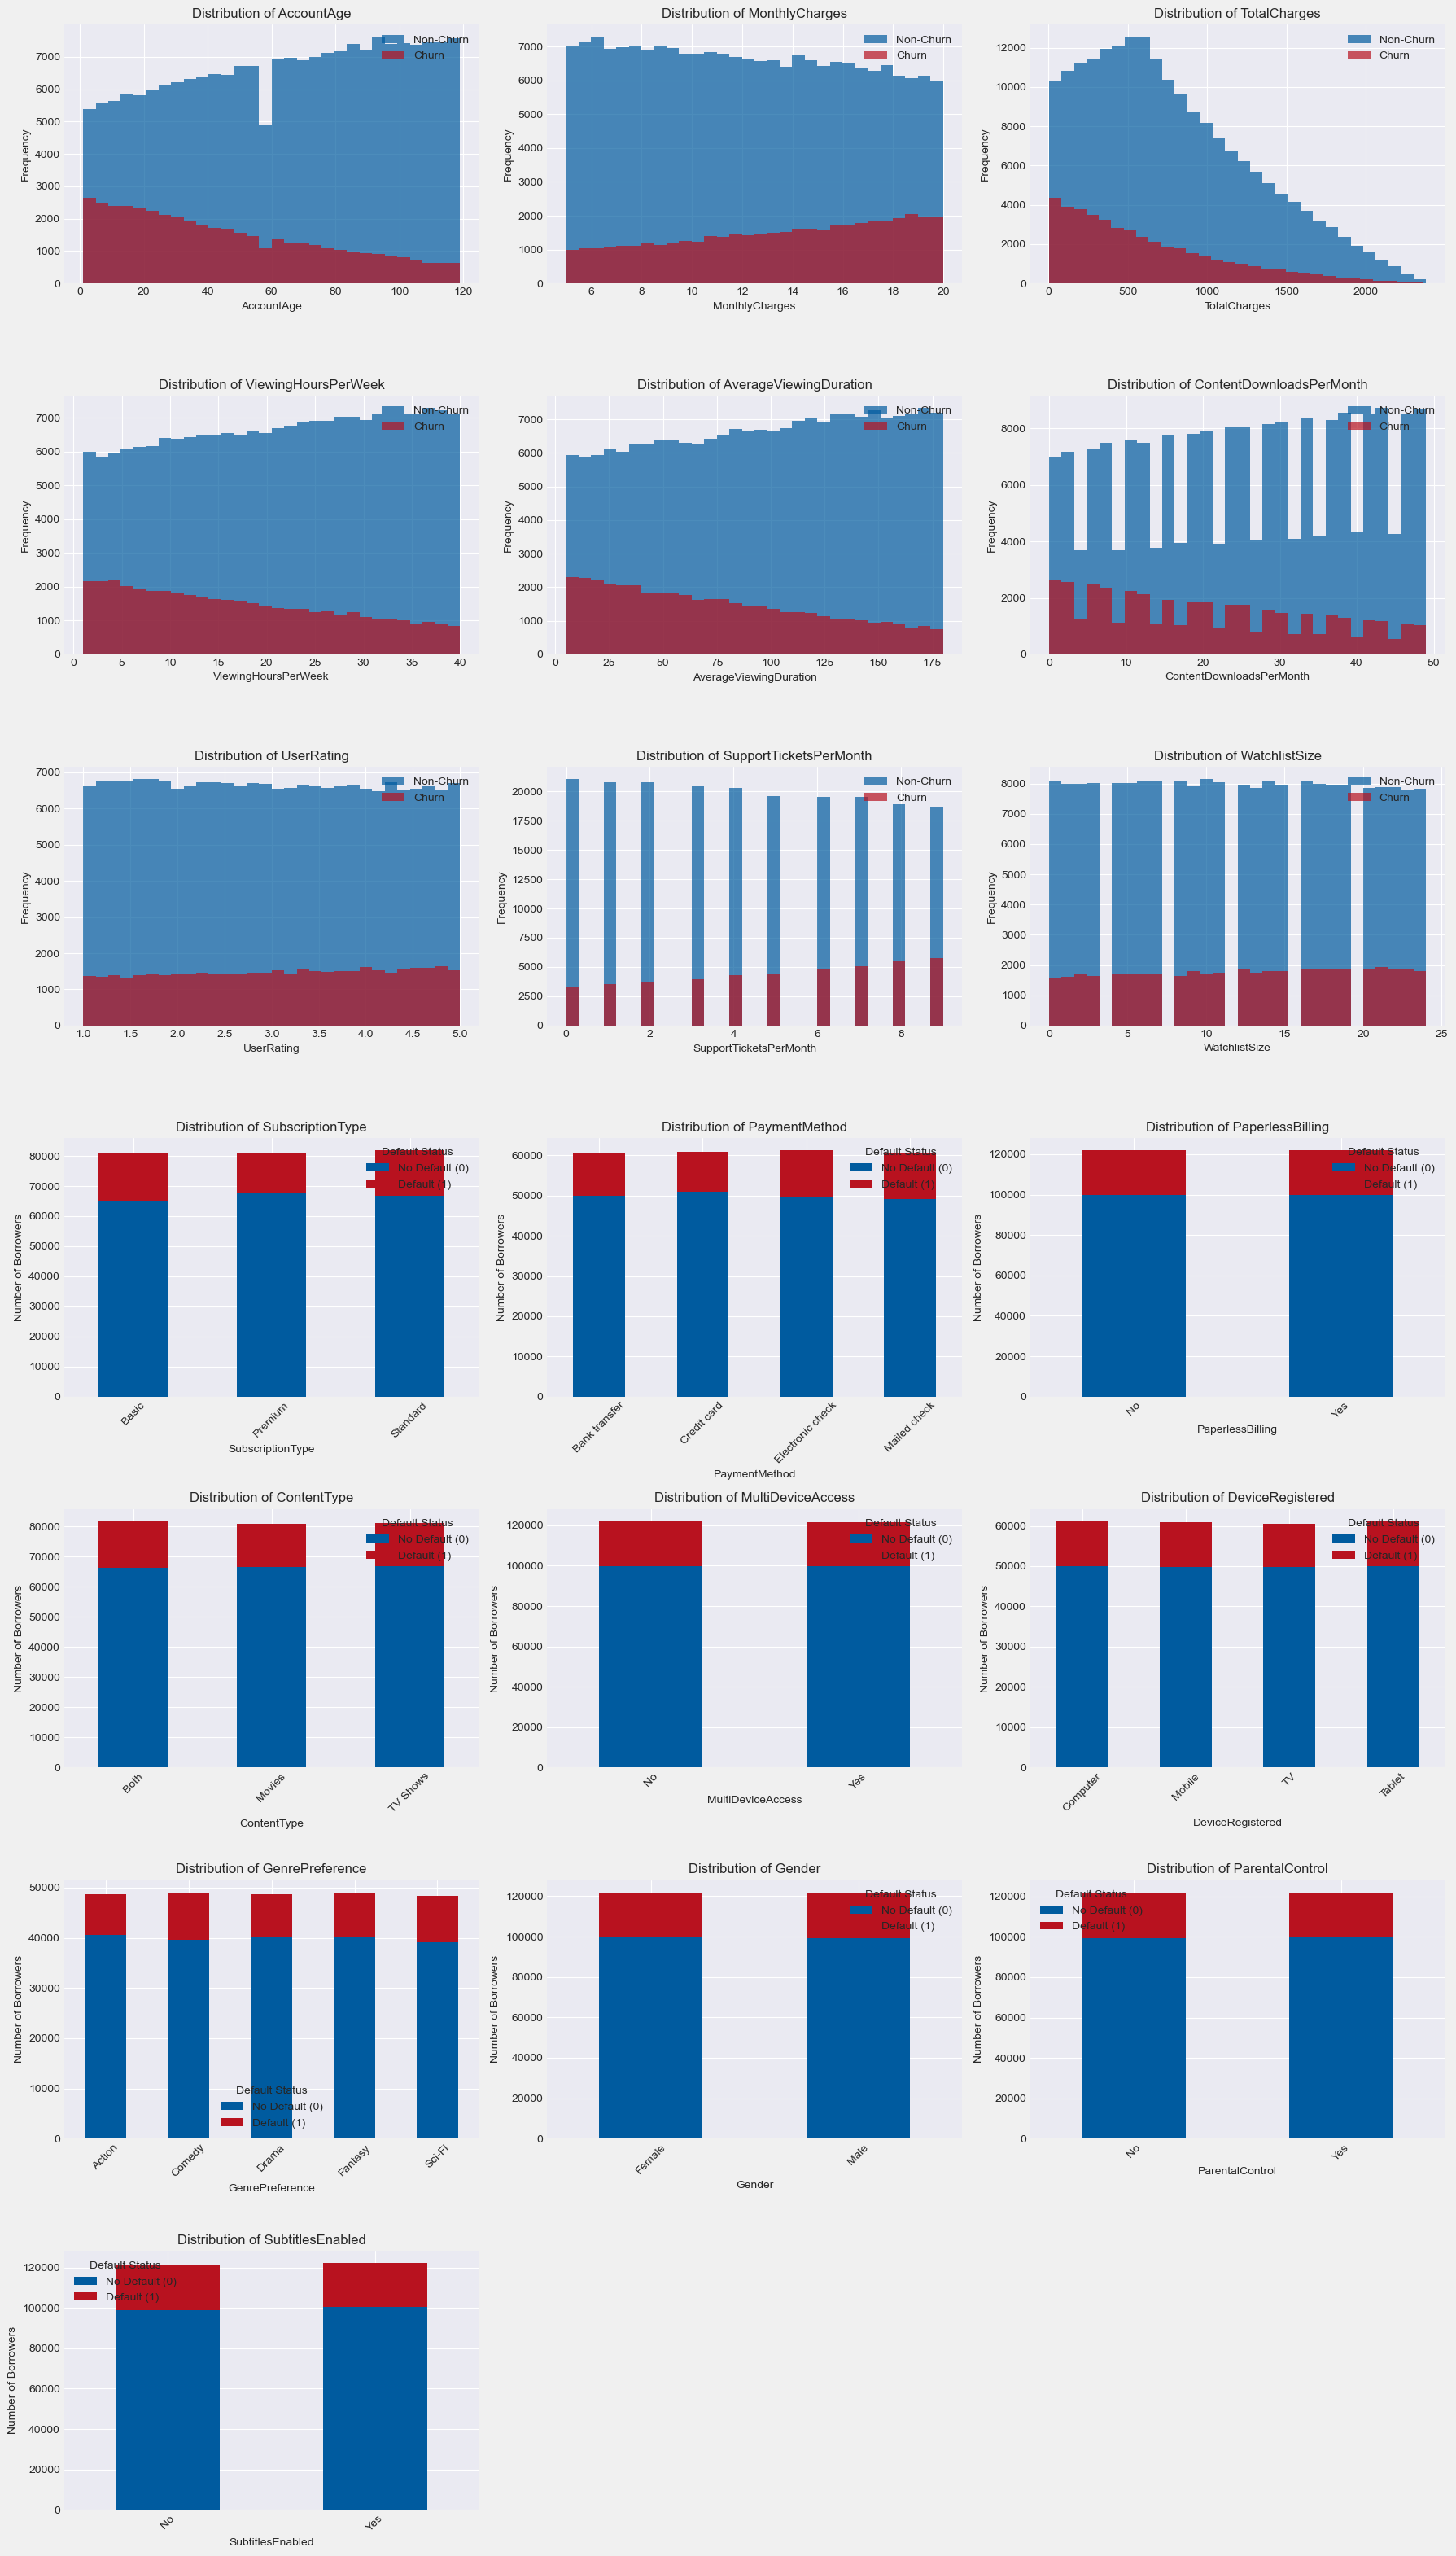

In [10]:
# Numerical Columns (for Histograms)
numerical_cols = [
    'AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', \
    'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize'
]

# Categorical Columns (for Bar Charts)
categorical_cols = [
    'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', \
    'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled'
]

all_cols_to_plot = numerical_cols + categorical_cols
data = train_df 

# --- 2. Optimize & Set Dark Style ---

# Set a dark Matplotlib style for better visualization
plt.style.use('seaborn-v0_8-darkgrid') 

# Filter the DataFrame once for performance
non_defaulted = data[data['Churn'] == 0]
defaulted = data[data['Churn'] == 1]

# --- 3. Setup Plot Canvas ---

num_plots = len(all_cols_to_plot)
n_cols = 3 
n_rows = (num_plots + n_cols - 1) // n_cols 

# Set figure background explicitly for clarity with dark plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4.5), facecolor='#f0f0f0') 
axes = axes.flatten()

# --- 4. Generate Plots ---

# Define dark, high-contrast colors
COLOR_NON_CHURN = '#005b9f'  # Dark Blue
COLOR_CHURN = '#b8121f'     # Deep Red

for i, col in enumerate(all_cols_to_plot):
    ax = axes[i]
    
    # --- A. NUMERICAL PLOT (Histogram) ---
    if col in numerical_cols:
        # Use pre-filtered data with dark colors
        non_defaulted[col].hist(ax=ax, bins=30, alpha=0.7, label='Non-Churn', color=COLOR_NON_CHURN)
        defaulted[col].hist(ax=ax, bins=30, alpha=0.7, label='Churn', color=COLOR_CHURN)
        ax.set_ylabel('Frequency')
        ax.legend(loc='upper right')

    # --- B. CATEGORICAL PLOT (Bar Chart) ---
    elif col in categorical_cols:
        # Calculate stacked counts
        default_counts = data.groupby(col)['Churn'].value_counts().unstack(fill_value=0)
        
        # Plot stacked bar chart using the defined colors
        default_counts.plot(kind='bar', stacked=True, ax=ax, color=[COLOR_NON_CHURN, COLOR_CHURN])
        ax.set_ylabel('Number of Borrowers')
        ax.legend(title='Default Status', labels=['No Default (0)', 'Default (1)'])
        ax.tick_params(axis='x', rotation=45) 
        
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)

# --- 5. Final Cleanup ---

# Hide any unused subplots
for i in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Reset Matplotlib style to default if you have other plots later
plt.style.use('default')

- Patterns of High Churn Cases:
1. Low AccountAge
2. High Monthly Charges
3. Low Total Charges
4. Low ViewingHoursPerWeek
5. Low AverageViewingDuration (Slight)
6. Low ContentDownloadsPerMonth
7. High SupportTicketsPerMonth (Slight)

C:\Users\minhg\AppData\Local\Temp\ipykernel_25476\3381218148.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\minhg\AppData\Local\Temp\ipykernel_25476\3381218148.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\minhg\AppData\Local\Temp\ipykernel_25476\3381218148.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\minhg\AppData\Local\Temp\ipykernel_25476\3381218148.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

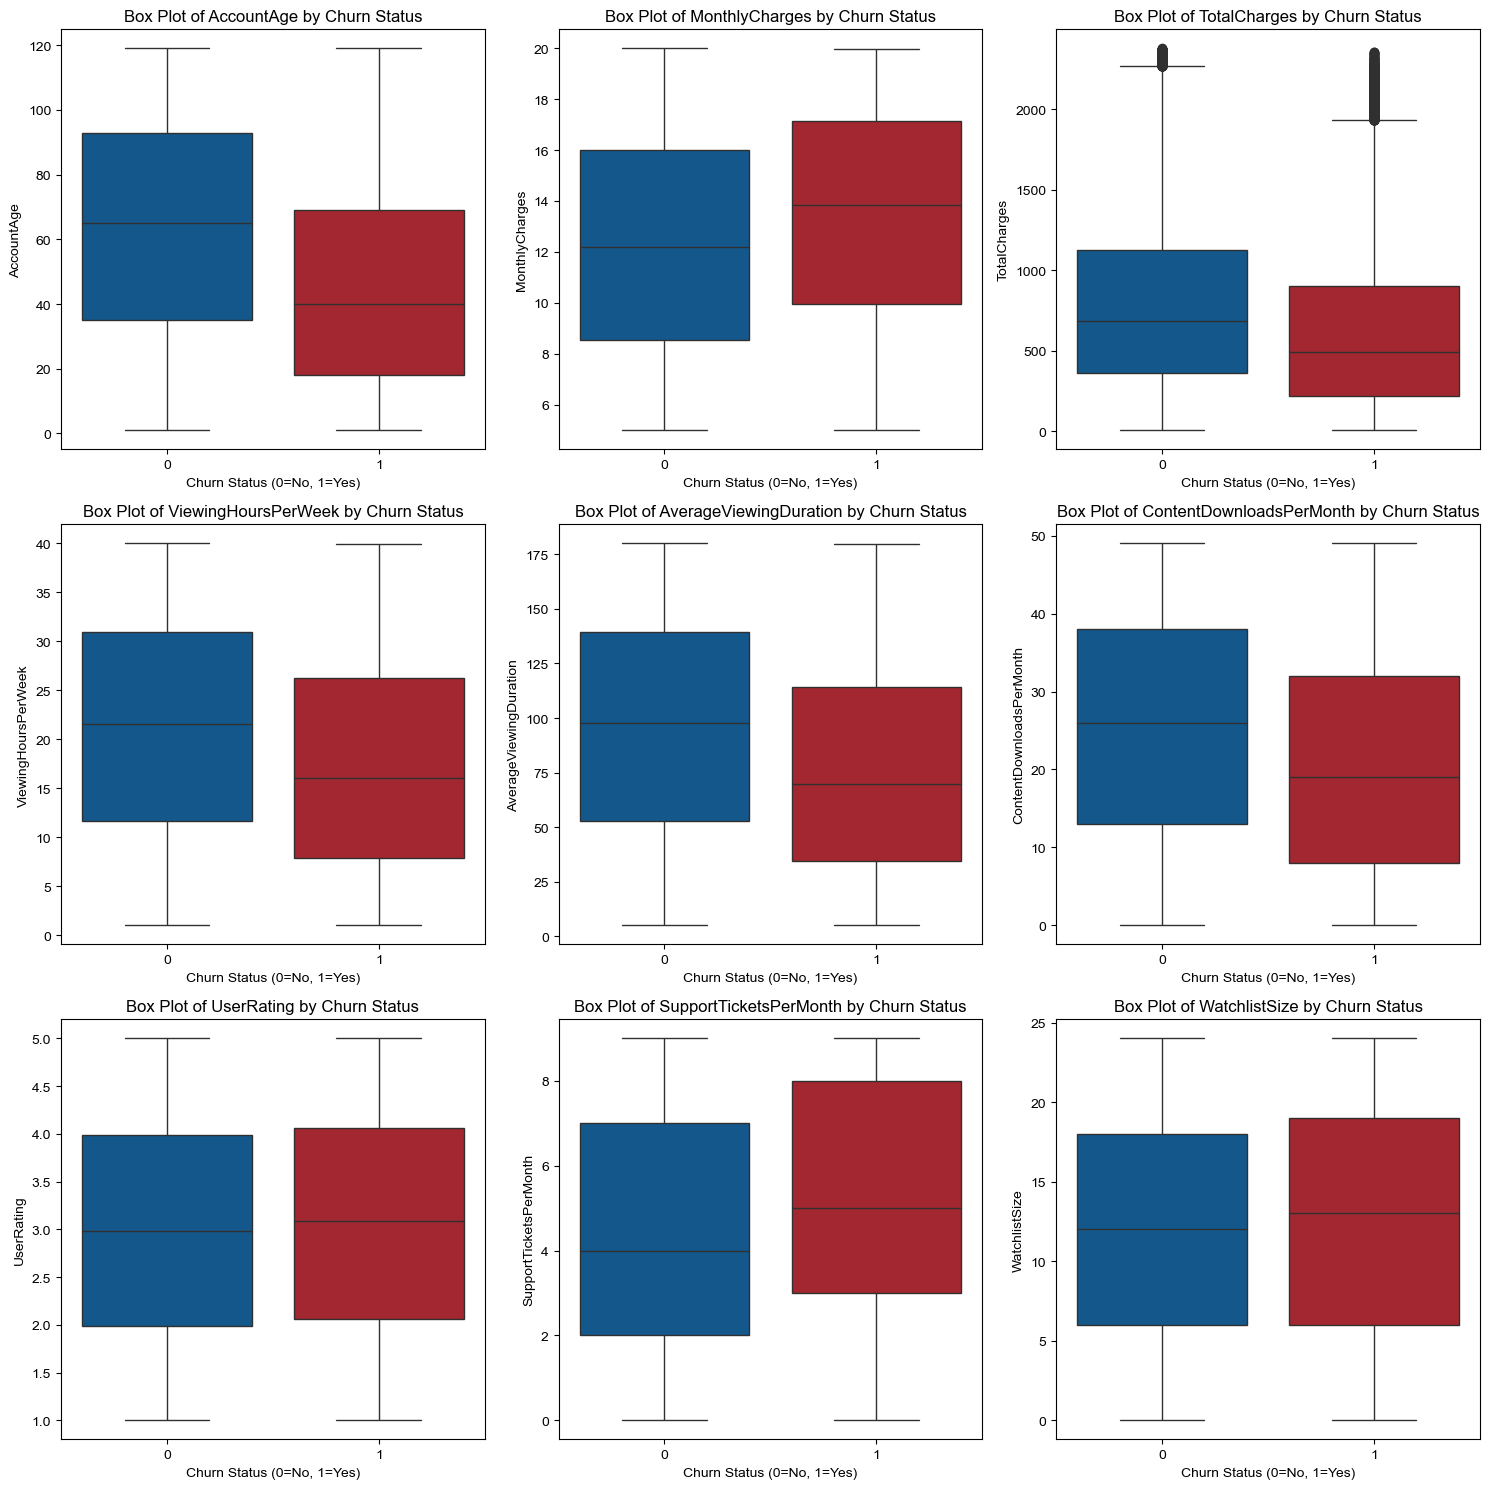

In [11]:
# 1. Define the numerical columns (for the box plot distributions)
numerical_cols = [
    'AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', \
    'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize'
]

# 2. Setup the plot canvas
num_plots = len(numerical_cols)
n_cols = 3 
n_rows = (num_plots + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()

# Set a style for better visualization (optional)
sns.set_style("whitegrid") 

# 3. Generate the box plots
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    
    # Use seaborn.boxplot to easily plot numerical data against the categorical target
    sns.boxplot(
        x='Churn',       # The categorical grouping variable
        y=col,             # The numerical data to plot
        data=train_df,
        ax=ax,
        palette=['#005b9f', '#b8121f'] # Darker colors for contrast
    )
    
    ax.set_title(f'Box Plot of {col} by Churn Status', fontsize=12)
    ax.set_xlabel('Churn Status (0=No, 1=Yes)', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

# Hide any unused subplots
for i in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

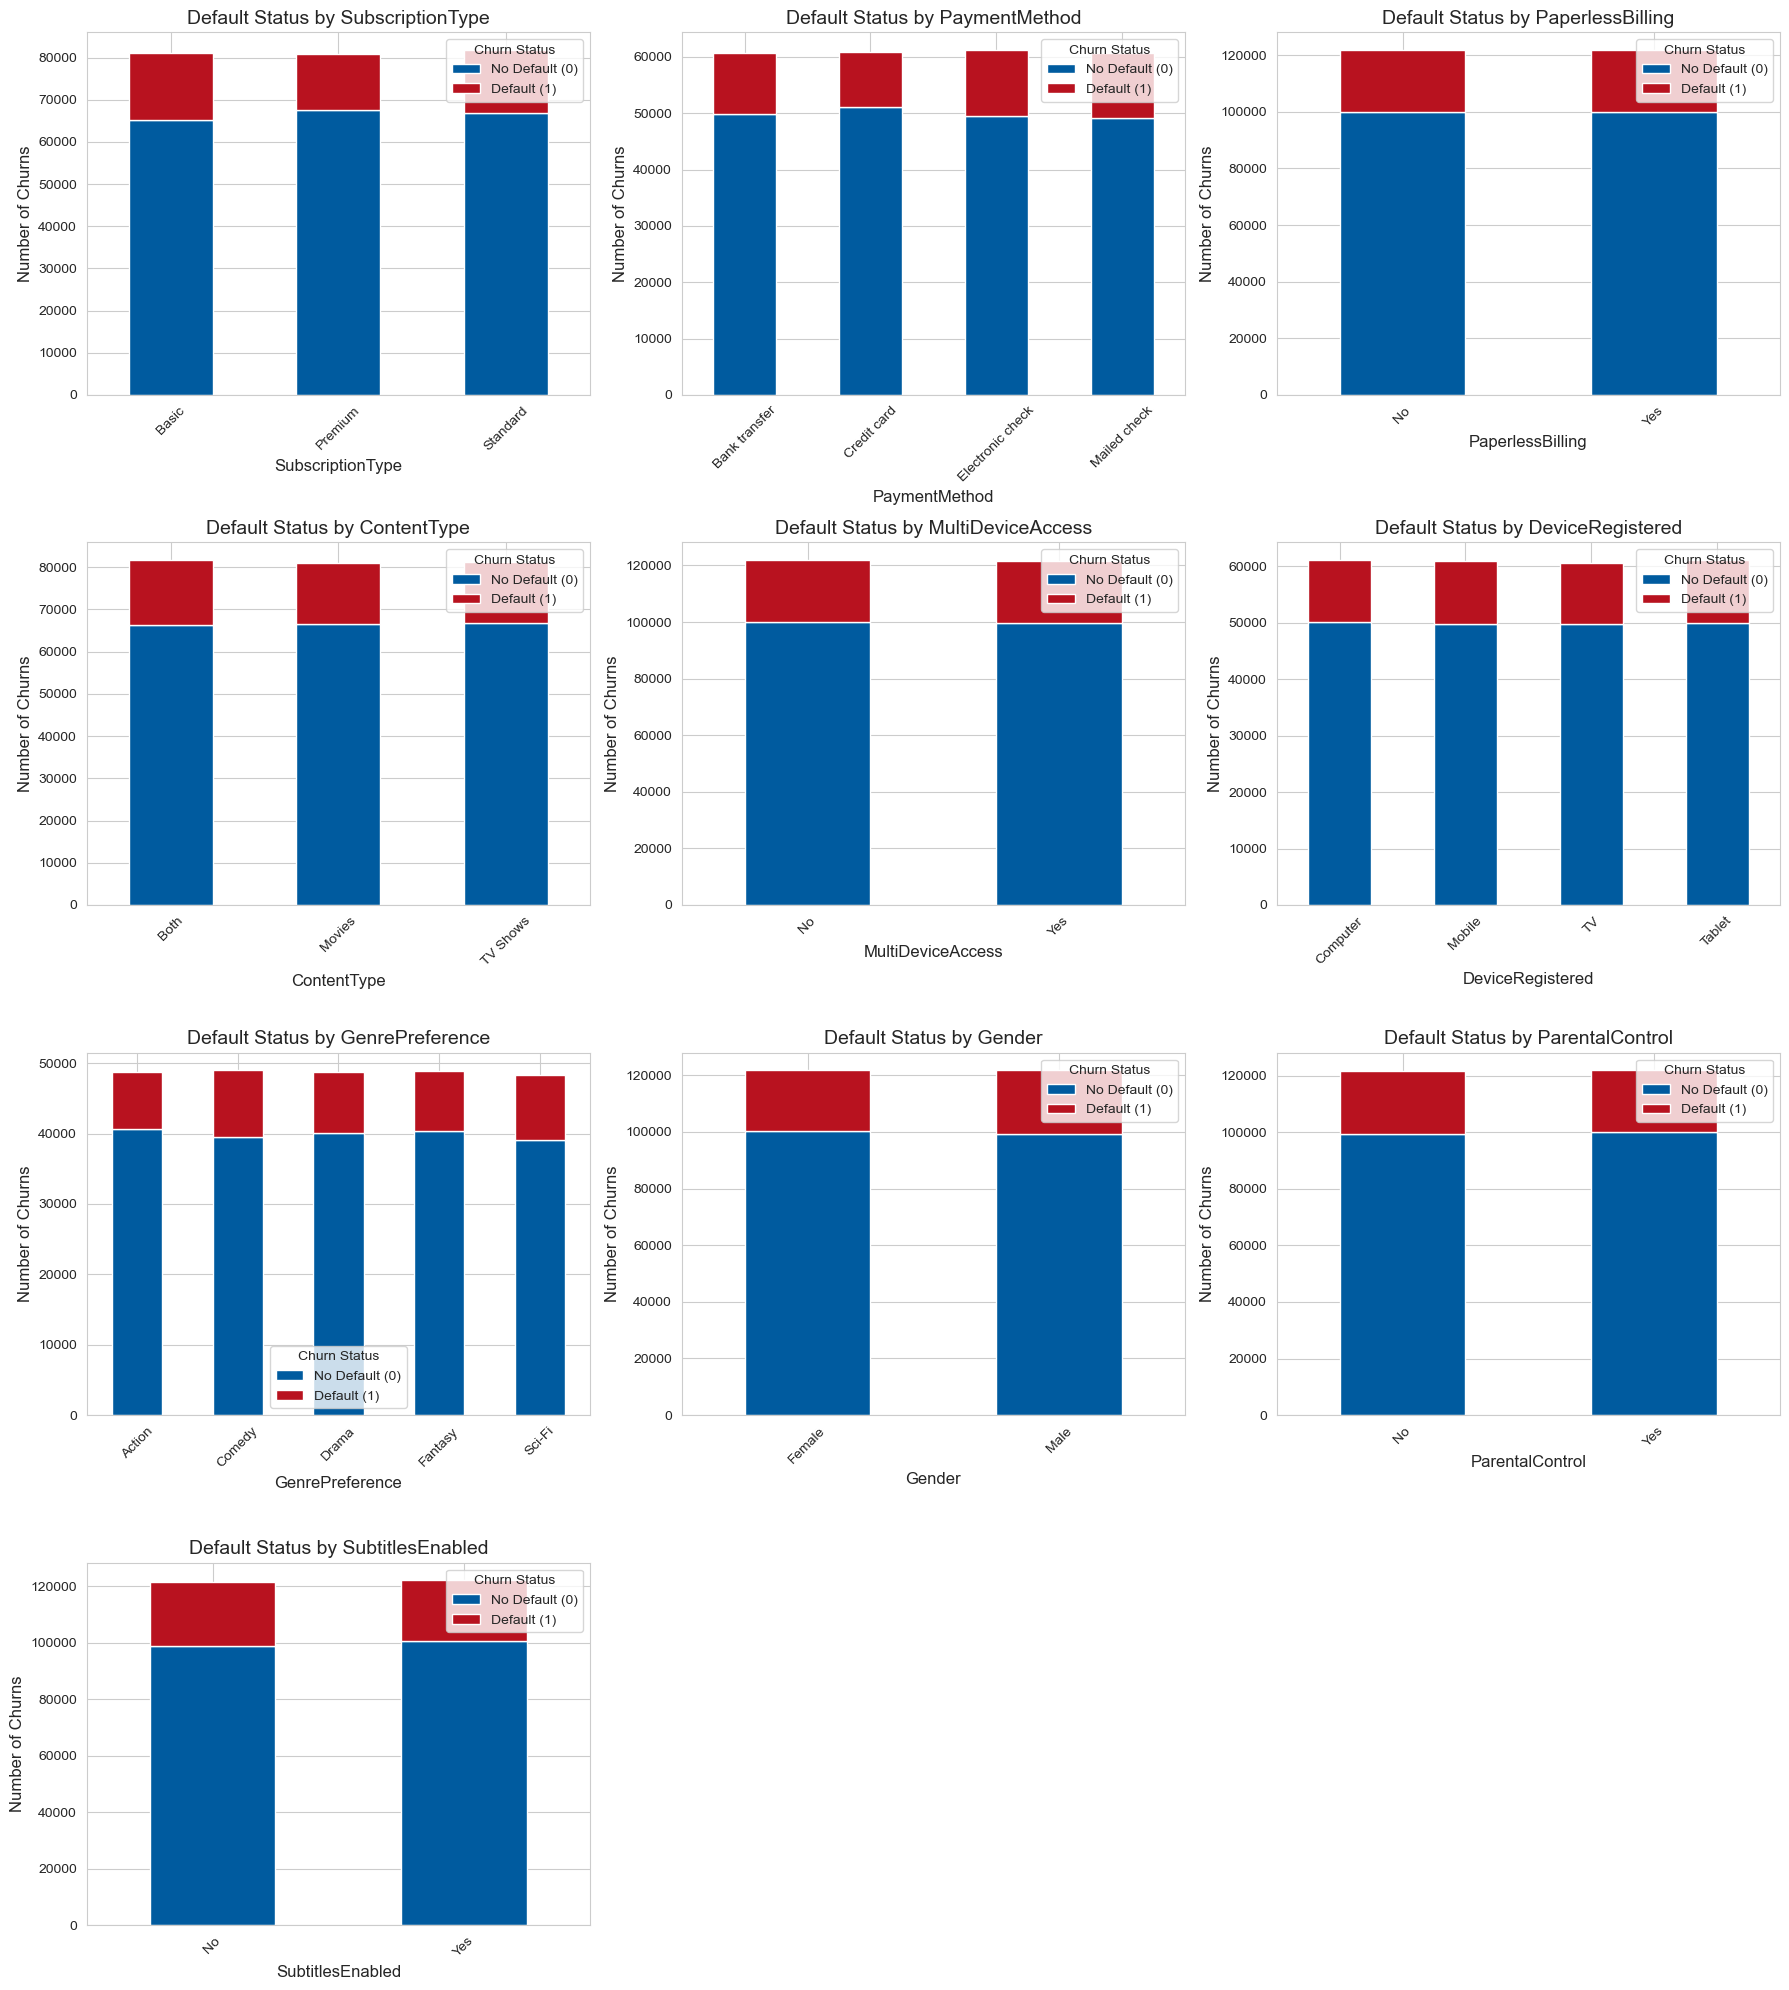

In [12]:
# 1. Define the categorical columns 
categorical_cols = [
    'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', \
    'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled'
]

# Define dark, high-contrast colors (consistent with previous plots)
COLOR_NON_CHURN = '#005b9f'  # Dark Blue
COLOR_CHURN = '#b8121f'     # Deep Red

# 2. Setup the plot canvas
num_plots = len(categorical_cols)
n_cols = 3 
n_rows = (num_plots + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

# 3. Generate the stacked bar plots
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Calculate the counts of Default (1) and Non-Default (0) for the current column
    # Group by the feature, then the target, and unstack to get columns for 0 and 1
    default_counts = train_df.groupby(col)['Churn'].value_counts().unstack(fill_value=0)
    
    # Plot the counts as a stacked bar chart
    default_counts.plot(kind='bar', stacked=True, ax=ax, color=[COLOR_NON_CHURN, COLOR_CHURN])
    
    ax.set_title(f'Default Status by {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Number of Churns', fontsize=12)
    
    # Clean up legend and rotation
    ax.legend(title='Churn Status', labels=['No Default (0)', 'Default (1)'])
    ax.tick_params(axis='x', rotation=45) 

# Hide any unused subplots
for j in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 4. Feature engineering

## 4.1 Remove unmeaningful collumn

In [7]:
if 'CustomerID' in train_df.columns:
    train_df.drop(columns=['CustomerID'], inplace=True)


## 4.2 Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

# Use a dedicated LabelEncoder per categorical column and save them in a dict
cat_cols = train_df.select_dtypes(include=['object']).columns
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    # Fit on train (convert to str to avoid issues with mixed types)
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    # For test, map using the fitted classes; unseen labels -> -1
    mapping = {label: idx for idx, label in enumerate(le.classes_)}
    test_df[col] = test_df[col].astype(str).map(mapping).fillna(-1).astype(int)
    encoders[col] = le


In [9]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,1,3,0,0,0,1,36.758104,63.531377,10,4,2.176498,4,1,3,0,0,0
1,57,5.175208,294.986882,0,1,1,1,0,3,32.450568,25.725595,18,0,3.478632,8,1,23,0,1,0
2,73,12.106657,883.785952,0,3,1,1,0,0,7.395160,57.364061,23,3,4.238824,6,1,1,1,1,0
3,32,7.263743,232.439774,0,2,0,2,0,3,27.960389,131.537507,30,2,4.276013,2,1,24,1,1,0
4,57,16.953078,966.325422,1,2,1,2,0,2,20.083397,45.356653,20,1,3.616170,4,0,0,0,0,0


In [10]:
test_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,1,3,0,2,0,2,29.126308,122.274031,42,1,3.522724,2,1,23,0,0,O1W6BHP6RM
1,77,9.912854,763.289768,0,2,1,2,0,2,36.873729,57.093319,43,0,2.021545,2,0,22,1,0,LFR4X92X8H
2,5,15.019011,75.095057,2,0,0,2,1,0,7.601729,140.414001,14,4,4.806126,2,0,22,0,1,QM5GBIYODA
3,88,15.357406,1351.451692,2,2,0,0,1,3,35.586430,177.002419,14,1,4.943900,0,0,23,1,1,D9RXTK2K9F
4,91,12.406033,1128.949004,2,1,1,2,1,3,23.503651,70.308376,6,2,2.846880,6,0,0,0,0,ENTCCHR1LR


## 4.3 Create new feature

In [11]:
# Tỷ lệ chi phí / tuổi tài khoản
train_df['AvgMonthlySpend'] = train_df['TotalCharges'] / (train_df['AccountAge'] + 1)
test_df['AvgMonthlySpend'] = test_df['TotalCharges'] / (test_df['AccountAge'] + 1)

# Hiệu quả xem nội dung
train_df['EngagementScore'] = train_df['ViewingHoursPerWeek'] / (train_df['SupportTicketsPerMonth'] + 1)
test_df['EngagementScore'] = test_df['ViewingHoursPerWeek'] / (test_df['SupportTicketsPerMonth'] + 1)

# Thói quen sử dụng
train_df['DownloadsPerHour'] = train_df['ContentDownloadsPerMonth'] / (train_df['ViewingHoursPerWeek'] + 0.1)
test_df['DownloadsPerHour'] = test_df['ContentDownloadsPerMonth'] / (test_df['ViewingHoursPerWeek'] + 0.1)

# 5. Prepare data for training

In [12]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Churn', axis=1)
y = train_df['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Training LigthGBM model

## 6.1 Hyperparameters tunning

In [13]:
# Install imbalanced-learn if not already installed
try:
    from imblearn.over_sampling import SMOTE, RandomOverSampler
    from imblearn.under_sampling import RandomUnderSampler
except ImportError:
    print("Installing imbalanced-learn...")
    import sys
    !{sys.executable} -m pip install imbalanced-learn -q
    from imblearn.over_sampling import SMOTE, RandomOverSampler
    from imblearn.under_sampling import RandomUnderSampler

print("✅ Sampling libraries loaded successfully")


✅ Sampling libraries loaded successfully


In [14]:
# Apply different sampling strategies to handle class imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check class distribution
print("Original class distribution:")
print(y_train.value_counts())
print(f"Imbalance ratio: {y_train.value_counts()[0] / y_train.value_counts()[1]:.2f}")

# 1. Normal Sampling (original data)
X_train_normal = X_train.copy()
y_train_normal = y_train.copy()

# 2. Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)
print(f"\nOversampling: {y_train_oversampled.value_counts().to_dict()}")

# 3. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
print(f"Undersampling: {y_train_undersampled.value_counts().to_dict()}")

# 4. SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"SMOTE: {y_train_smote.value_counts().to_dict()}")

# Store all datasets for evaluation
X_train_datasets = [X_train_normal, X_train_oversampled, X_train_undersampled, X_train_smote]
y_train_datasets = [y_train_normal, y_train_oversampled, y_train_undersampled, y_train_smote]
sampling_strategies = ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']

print("\n✅ Sampling strategies prepared")


Original class distribution:
Churn
0    159684
1     35345
Name: count, dtype: int64
Imbalance ratio: 4.52

Oversampling: {0: 159684, 1: 159684}
Undersampling: {0: 35345, 1: 35345}


c:\Users\minhg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\minhg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\minhg\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\minhg\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

SMOTE: {0: 159684, 1: 159684}

✅ Sampling strategies prepared


In [15]:
# Hyperparameter tuning for LightGBM with different sampling strategies
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score
import scipy.stats as stats

# Define parameter grid for tuning
param_distributions = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'num_leaves': [31, 50, 64, 100],
    'max_depth': [-1, 5, 7, 10],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
}

# Custom scorer that balances recall and precision to meet targets
# Recall(1) >= 0.75, Precision(1) >= 0.45, F1(1) >= 0.55
def custom_score(y_true, y_pred):
    from sklearn.metrics import precision_score, recall_score, f1_score
    recall = recall_score(y_true, y_pred, zero_division=0)
    precision = precision_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # Penalize if below targets, reward if above
    recall_bonus = max(0, recall - 0.75) * 2
    precision_bonus = max(0, precision - 0.45) * 1
    
    return f1 + recall_bonus + precision_bonus

custom_scorer = make_scorer(custom_score, greater_is_better=True)

# Store best parameters for each strategy
best_params_dict = {}

print("Starting hyperparameter tuning for each sampling strategy...")
print("This may take 5-15 minutes depending on your hardware.\n")

for strategy_name, X_train_sample, y_train_sample in zip(
    sampling_strategies, X_train_datasets, y_train_datasets):
    
    print(f"{'='*60}")
    print(f"Tuning: {strategy_name}")
    print(f"{'='*60}")
    
    # Base model configuration
    base_params = {
        'random_state': 42,
        'verbose': -1,
        'importance_type': 'gain',
    }
    
    # Add class_weight for Normal Sampling
    if strategy_name == 'Normal Sampling':
        neg_count = sum(y_train_sample == 0)
        pos_count = sum(y_train_sample == 1)
        class_ratio = neg_count / pos_count
        if class_ratio > 1.5:
            base_params['is_unbalance'] = True
            print(f"  Class imbalance ratio: {class_ratio:.2f} - Using is_unbalance=True")
    
    # Create base model
    lgbm_base = lgb.LGBMClassifier(**base_params)
    
    # Randomized search (faster than GridSearch)
    random_search = RandomizedSearchCV(
        estimator=lgbm_base,
        param_distributions=param_distributions,
        n_iter=30,  # Test 30 random combinations
        scoring=custom_scorer,
        cv=3,  # 3-fold cross-validation
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the search
    random_search.fit(X_train_sample, y_train_sample)
    
    # Store best parameters
    best_params_dict[strategy_name] = random_search.best_params_
    
    print(f"\n✅ Best parameters for {strategy_name}:")
    for param, value in random_search.best_params_.items():
        print(f"  {param}: {value}")
    print(f"  Best CV Score: {random_search.best_score_:.4f}\n")

print("\n" + "="*60)
print("Hyperparameter tuning completed!")
print("="*60)


Starting hyperparameter tuning for each sampling strategy...
This may take 5-15 minutes depending on your hardware.

Tuning: Normal Sampling
  Class imbalance ratio: 4.52 - Using is_unbalance=True
Fitting 3 folds for each of 30 candidates, totalling 90 fits

✅ Best parameters for Normal Sampling:
  subsample: 1.0
  reg_lambda: 0.1
  reg_alpha: 0.1
  num_leaves: 64
  n_estimators: 500
  min_child_samples: 50
  max_depth: 10
  learning_rate: 0.01
  colsample_bytree: 0.7
  Best CV Score: 0.4352

Tuning: Over Sampling
Fitting 3 folds for each of 30 candidates, totalling 90 fits

✅ Best parameters for Over Sampling:
  subsample: 1.0
  reg_lambda: 0.1
  reg_alpha: 0.5
  num_leaves: 50
  n_estimators: 1000
  min_child_samples: 30
  max_depth: 7
  learning_rate: 0.1
  colsample_bytree: 0.9
  Best CV Score: 1.3033

Tuning: Under Sampling
Fitting 3 folds for each of 30 candidates, totalling 90 fits

✅ Best parameters for Under Sampling:
  subsample: 0.8
  reg_lambda: 0
  reg_alpha: 0
  num_leave

## 6.2 Train and evaluate models with best parameters

Training and evaluating models with optimized parameters...

Evaluating: Normal Sampling

Validation Metrics:
  Accuracy:     0.8188
  Precision(1): 0.0000 ❌ (target: ≥0.45)
  Recall(1):    0.0000 ❌ (target: ≥0.75)
  F1(1):        0.0000 ❌ (target: ≥0.55)
  ROC AUC:      0.7391

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      1.00      0.90     39921
       Churn       0.00      0.00      0.00      8837

    accuracy                           0.82     48758
   macro avg       0.41      0.50      0.45     48758
weighted avg       0.67      0.82      0.74     48758

____________________________________________________________

Evaluating: Over Sampling


c:\Users\minhg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\minhg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\minhg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Validation Metrics:
  Accuracy:     0.6782
  Precision(1): 0.3200 ❌ (target: ≥0.45)
  Recall(1):    0.6894 ❌ (target: ≥0.75)
  F1(1):        0.4371 ❌ (target: ≥0.55)
  ROC AUC:      0.7502

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.68      0.77     39921
       Churn       0.32      0.69      0.44      8837

    accuracy                           0.68     48758
   macro avg       0.61      0.68      0.61     48758
weighted avg       0.80      0.68      0.71     48758

____________________________________________________________

Evaluating: Under Sampling

Validation Metrics:
  Accuracy:     0.6719
  Precision(1): 0.3172 ❌ (target: ≥0.45)
  Recall(1):    0.7028 ❌ (target: ≥0.75)
  F1(1):        0.4371 ❌ (target: ≥0.55)
  ROC AUC:      0.7506

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.67      0.77     39921
       Churn       0.32      0.70      0.44    

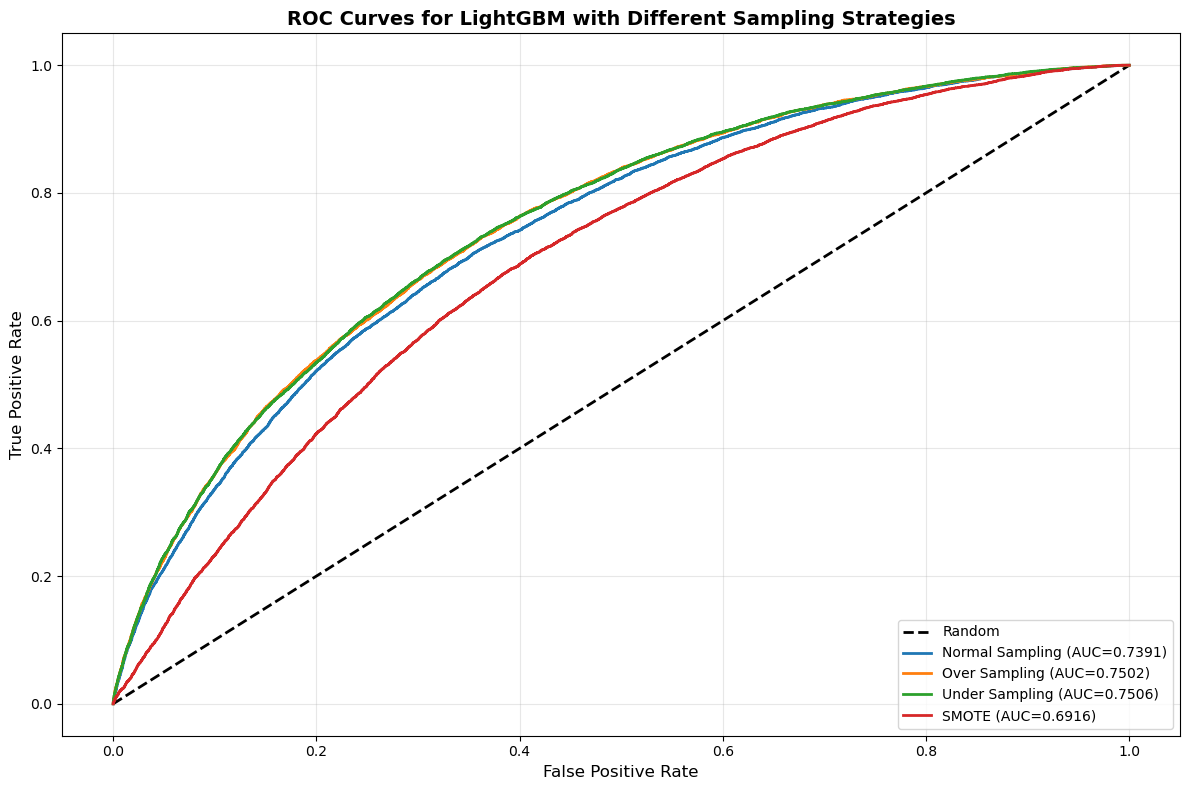


SUMMARY: LightGBM Performance Across Sampling Strategies
       Strategy Accuracy Precision(1) Recall(1)  F1(1) ROC AUC
Normal Sampling   0.8188       0.0000    0.0000 0.0000  0.7391
  Over Sampling   0.6782       0.3200    0.6894 0.4371  0.7502
 Under Sampling   0.6719       0.3172    0.7028 0.4371  0.7506
          SMOTE   0.7344       0.3196    0.4122 0.3601  0.6916

🏆 Best performing strategy: Over Sampling
   F1 Score: 0.4371


In [16]:
# Train models with best parameters and evaluate on validation set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Dictionary to store trained models and results
trained_models = {}
lgbm_results = {}

# Setup plot for ROC curves comparison
plt.figure(figsize=(12, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=2)

print("Training and evaluating models with optimized parameters...\n")

for strategy_name, X_train_sample, y_train_sample in zip(
    sampling_strategies, X_train_datasets, y_train_datasets):
    
    print(f"{'='*60}")
    print(f"Evaluating: {strategy_name}")
    print(f"{'='*60}")
    
    try:
        # Get best parameters for this strategy
        best_params = best_params_dict[strategy_name].copy()
        
        # Add base parameters
        best_params['random_state'] = 42
        best_params['verbose'] = -1
        best_params['importance_type'] = 'gain'
        
        # Add is_unbalance for Normal Sampling if needed
        if strategy_name == 'Normal Sampling':
            neg_count = sum(y_train_sample == 0)
            pos_count = sum(y_train_sample == 1)
            class_ratio = neg_count / pos_count
            if class_ratio > 1.5:
                best_params['is_unbalance'] = True
        
        # Create and train model with early stopping
        model = lgb.LGBMClassifier(**best_params)
        model.fit(
            X_train_sample, y_train_sample,
            eval_set=[(X_val, y_val)],
            eval_metric='auc',
            callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
        )
        
        # Store trained model
        trained_models[strategy_name] = model
        
        # Get predictions
        y_pred_val = model.predict(X_val)
        y_prob_val = model.predict_proba(X_val)[:, 1]
        
        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_val, y_pred_val),
            'precision': precision_score(y_val, y_pred_val, zero_division=0),
            'recall': recall_score(y_val, y_pred_val, zero_division=0),
            'f1': f1_score(y_val, y_pred_val, zero_division=0),
            'auc': roc_auc_score(y_val, y_prob_val)
        }
        
        # Store results
        lgbm_results[strategy_name] = metrics
        
        # Print metrics
        print(f"\nValidation Metrics:")
        print(f"  Accuracy:     {metrics['accuracy']:.4f}")
        print(f"  Precision(1): {metrics['precision']:.4f} {'✅' if metrics['precision'] >= 0.45 else '❌'} (target: ≥0.45)")
        print(f"  Recall(1):    {metrics['recall']:.4f} {'✅' if metrics['recall'] >= 0.75 else '❌'} (target: ≥0.75)")
        print(f"  F1(1):        {metrics['f1']:.4f} {'✅' if metrics['f1'] >= 0.55 else '❌'} (target: ≥0.55)")
        print(f"  ROC AUC:      {metrics['auc']:.4f}")
        
        # Check if all targets are met
        targets_met = (
            metrics['precision'] >= 0.45 and
            metrics['recall'] >= 0.75 and
            metrics['f1'] >= 0.55 and
            metrics['accuracy'] >= 0.70
        )
        
        if targets_met:
            print(f"\n🎯 All targets met for {strategy_name}!")
        
        # Print classification report
        print(f"\nClassification Report:")
        print(classification_report(y_val, y_pred_val, target_names=['No Churn', 'Churn']))
        
        # Add ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_prob_val)
        plt.plot(fpr, tpr, label=f'{strategy_name} (AUC={metrics["auc"]:.4f})', linewidth=2)
        
    except Exception as e:
        print(f"❌ Error during evaluation: {str(e)}")
        lgbm_results[strategy_name] = {
            'accuracy': float('nan'),
            'precision': float('nan'),
            'recall': float('nan'),
            'f1': float('nan'),
            'auc': float('nan')
        }
    
    print("_" * 60 + "\n")

# Complete the ROC curve plot
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for LightGBM with Different Sampling Strategies', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Create summary dataframe
summary_df = pd.DataFrame({
    'Strategy': list(lgbm_results.keys()),
    'Accuracy': [f"{lgbm_results[k]['accuracy']:.4f}" for k in lgbm_results],
    'Precision(1)': [f"{lgbm_results[k]['precision']:.4f}" for k in lgbm_results],
    'Recall(1)': [f"{lgbm_results[k]['recall']:.4f}" for k in lgbm_results],
    'F1(1)': [f"{lgbm_results[k]['f1']:.4f}" for k in lgbm_results],
    'ROC AUC': [f"{lgbm_results[k]['auc']:.4f}" for k in lgbm_results]
})

print("\n" + "="*80)
print("SUMMARY: LightGBM Performance Across Sampling Strategies")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)

# Find best strategy based on F1 score
best_strategy = max(lgbm_results.items(), key=lambda x: x[1]['f1'])[0]
print(f"\n🏆 Best performing strategy: {best_strategy}")
print(f"   F1 Score: {lgbm_results[best_strategy]['f1']:.4f}")


## 6.3 Select best model and fine-tune threshold

Selected model: Over Sampling
Training set used: Over Sampling

⚠️ No threshold meets ALL targets. Finding best trade-off...

Selected threshold with Recall ≥ 0.75 and best F1: 0.455

Metrics at selected threshold:
  Precision(1): 0.2989 (❌ target: ≥0.45)
  Recall(1):    0.7544 (✅ target: ≥0.75)
  F1(1):        0.4282 (❌ target: ≥0.55)
  Accuracy:     0.6348 (❌ target: ≥0.7)

Final Validation Results with Optimal Threshold
              precision    recall  f1-score   support

    No Churn       0.92      0.61      0.73     39921
       Churn       0.30      0.75      0.43      8837

    accuracy                           0.63     48758
   macro avg       0.61      0.68      0.58     48758
weighted avg       0.81      0.63      0.68     48758



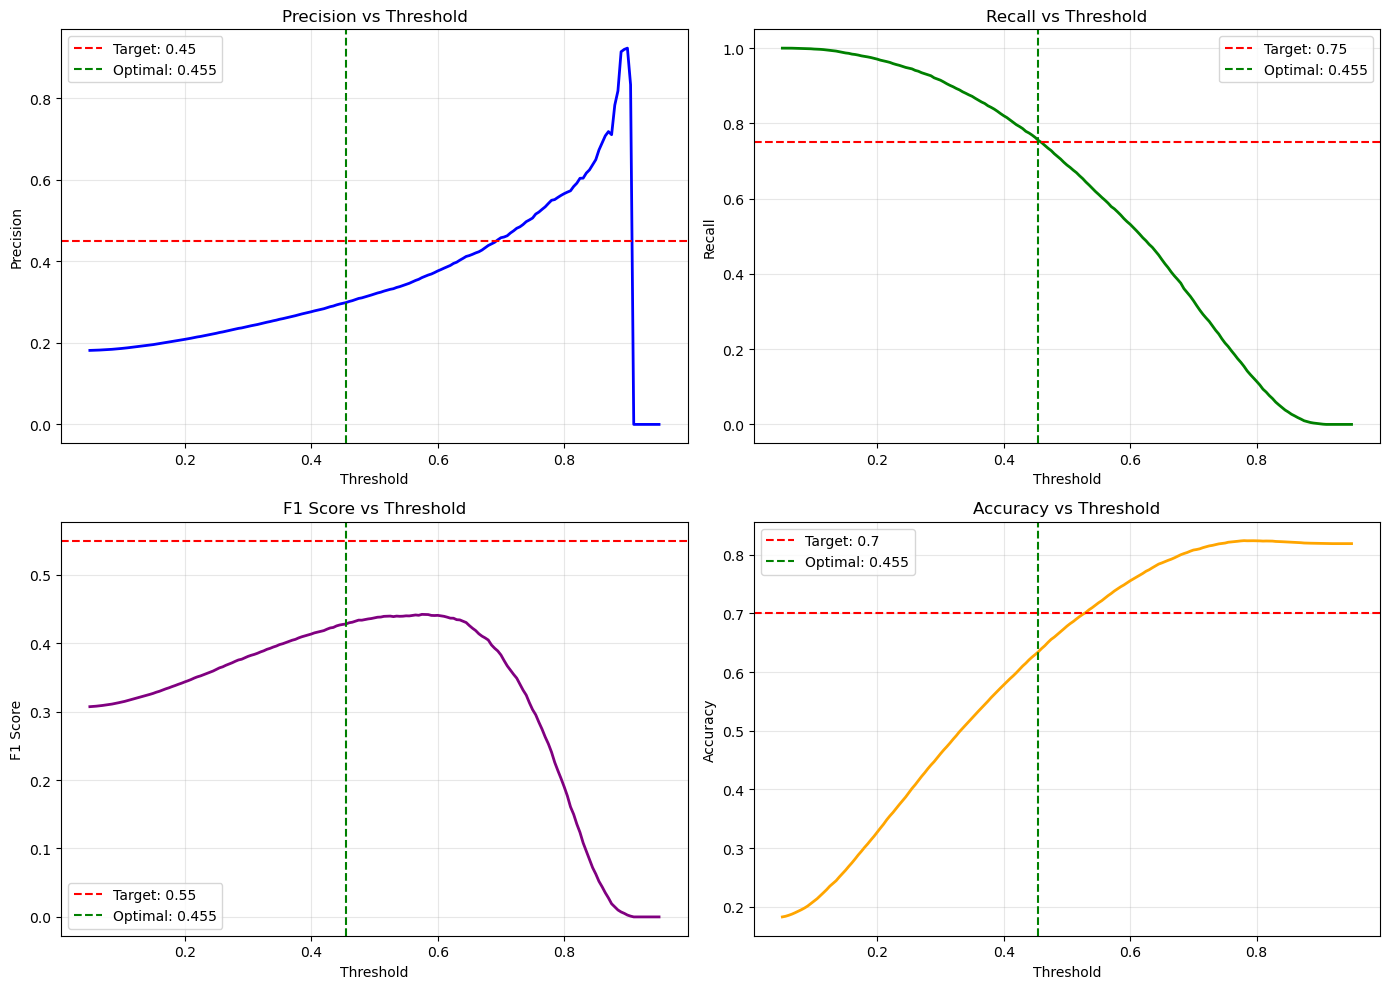


✅ Best model and threshold selected and ready for test predictions


In [17]:
# Select the best model and fine-tune decision threshold
import numpy as np

# Select best model based on F1 score (or you can choose based on meeting all targets)
best_strategy = max(lgbm_results.items(), key=lambda x: x[1]['f1'])[0]
model = trained_models[best_strategy]

print(f"Selected model: {best_strategy}")
print(f"Training set used: {sampling_strategies[list(trained_models.keys()).index(best_strategy)]}\n")

# Get probabilities on validation set
y_prob_val = model.predict_proba(X_val)[:, 1]

# Define target metrics
TARGETS = {
    'precision': 0.45,
    'recall': 0.75,
    'f1': 0.55,
    'accuracy': 0.70,
}

# Search for optimal threshold
thresholds = np.linspace(0.05, 0.95, 181)  # Test 181 thresholds
results = []

for t in thresholds:
    y_pred_t = (y_prob_val >= t).astype(int)
    p = precision_score(y_val, y_pred_t, pos_label=1, zero_division=0)
    r = recall_score(y_val, y_pred_t, pos_label=1, zero_division=0)
    f1 = f1_score(y_val, y_pred_t, pos_label=1, zero_division=0)
    acc = accuracy_score(y_val, y_pred_t)
    
    # Check if all targets are met
    targets_met = (p >= TARGETS['precision']) and (r >= TARGETS['recall']) and \
                  (f1 >= TARGETS['f1']) and (acc >= TARGETS['accuracy'])
    
    results.append({
        'threshold': t,
        'precision': p,
        'recall': r,
        'f1': f1,
        'accuracy': acc,
        'targets_met': targets_met
    })

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find thresholds that meet all targets
valid_thresholds = results_df[results_df['targets_met'] == True]

if len(valid_thresholds) > 0:
    # Sort by F1 score (descending), then by Recall (descending)
    valid_thresholds = valid_thresholds.sort_values(['f1', 'recall'], ascending=[False, False])
    best_row = valid_thresholds.iloc[0]
    best_threshold = best_row['threshold']
    
    print("✅ Found thresholds that meet ALL targets!")
    print(f"\n🎯 Optimal threshold: {best_threshold:.3f}")
    print(f"\nMetrics at optimal threshold:")
    print(f"  Precision(1): {best_row['precision']:.4f} ({'✅' if best_row['precision'] >= TARGETS['precision'] else '❌'} target: ≥{TARGETS['precision']})")
    print(f"  Recall(1):    {best_row['recall']:.4f} ({'✅' if best_row['recall'] >= TARGETS['recall'] else '❌'} target: ≥{TARGETS['recall']})")
    print(f"  F1(1):        {best_row['f1']:.4f} ({'✅' if best_row['f1'] >= TARGETS['f1'] else '❌'} target: ≥{TARGETS['f1']})")
    print(f"  Accuracy:     {best_row['accuracy']:.4f} ({'✅' if best_row['accuracy'] >= TARGETS['accuracy'] else '❌'} target: ≥{TARGETS['accuracy']})")
    
    print(f"\nNumber of valid thresholds found: {len(valid_thresholds)}")
    print(f"Threshold range: [{valid_thresholds['threshold'].min():.3f}, {valid_thresholds['threshold'].max():.3f}]")
    
else:
    # No threshold meets all targets, find best trade-off
    print("⚠️ No threshold meets ALL targets. Finding best trade-off...\n")
    
    # Prioritize: recall >= 0.75, then maximize F1
    high_recall = results_df[results_df['recall'] >= TARGETS['recall']]
    
    if len(high_recall) > 0:
        high_recall = high_recall.sort_values(['f1', 'precision'], ascending=[False, False])
        best_row = high_recall.iloc[0]
        best_threshold = best_row['threshold']
        print(f"Selected threshold with Recall ≥ 0.75 and best F1: {best_threshold:.3f}")
    else:
        # If can't even get recall >= 0.75, maximize F1
        results_df = results_df.sort_values('f1', ascending=False)
        best_row = results_df.iloc[0]
        best_threshold = best_row['threshold']
        print(f"Selected threshold with maximum F1: {best_threshold:.3f}")
    
    print(f"\nMetrics at selected threshold:")
    print(f"  Precision(1): {best_row['precision']:.4f} ({'✅' if best_row['precision'] >= TARGETS['precision'] else '❌'} target: ≥{TARGETS['precision']})")
    print(f"  Recall(1):    {best_row['recall']:.4f} ({'✅' if best_row['recall'] >= TARGETS['recall'] else '❌'} target: ≥{TARGETS['recall']})")
    print(f"  F1(1):        {best_row['f1']:.4f} ({'✅' if best_row['f1'] >= TARGETS['f1'] else '❌'} target: ≥{TARGETS['f1']})")
    print(f"  Accuracy:     {best_row['accuracy']:.4f} ({'✅' if best_row['accuracy'] >= TARGETS['accuracy'] else '❌'} target: ≥{TARGETS['accuracy']})")

# Apply optimal threshold
y_pred_val_optimal = (y_prob_val >= best_threshold).astype(int)

print(f"\n{'='*60}")
print("Final Validation Results with Optimal Threshold")
print(f"{'='*60}")
print(classification_report(y_val, y_pred_val_optimal, target_names=['No Churn', 'Churn']))

# Visualize threshold impact
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Precision vs Threshold
axes[0, 0].plot(results_df['threshold'], results_df['precision'], 'b-', linewidth=2)
axes[0, 0].axhline(y=TARGETS['precision'], color='r', linestyle='--', label=f"Target: {TARGETS['precision']}")
axes[0, 0].axvline(x=best_threshold, color='g', linestyle='--', label=f"Optimal: {best_threshold:.3f}")
axes[0, 0].set_xlabel('Threshold')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision vs Threshold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Recall vs Threshold
axes[0, 1].plot(results_df['threshold'], results_df['recall'], 'g-', linewidth=2)
axes[0, 1].axhline(y=TARGETS['recall'], color='r', linestyle='--', label=f"Target: {TARGETS['recall']}")
axes[0, 1].axvline(x=best_threshold, color='g', linestyle='--', label=f"Optimal: {best_threshold:.3f}")
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_title('Recall vs Threshold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: F1 Score vs Threshold
axes[1, 0].plot(results_df['threshold'], results_df['f1'], 'purple', linewidth=2)
axes[1, 0].axhline(y=TARGETS['f1'], color='r', linestyle='--', label=f"Target: {TARGETS['f1']}")
axes[1, 0].axvline(x=best_threshold, color='g', linestyle='--', label=f"Optimal: {best_threshold:.3f}")
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].set_title('F1 Score vs Threshold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Accuracy vs Threshold
axes[1, 1].plot(results_df['threshold'], results_df['accuracy'], 'orange', linewidth=2)
axes[1, 1].axhline(y=TARGETS['accuracy'], color='r', linestyle='--', label=f"Target: {TARGETS['accuracy']}")
axes[1, 1].axvline(x=best_threshold, color='g', linestyle='--', label=f"Optimal: {best_threshold:.3f}")
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Accuracy vs Threshold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Best model and threshold selected and ready for test predictions")


## 6.4 Feature importance analysis

Top 20 Most Important Features:
                 feature    importance
              AccountAge 100191.482672
  AverageViewingDuration  72656.474871
         EngagementScore  61801.169405
ContentDownloadsPerMonth  52107.310806
          MonthlyCharges  39423.884996
            TotalCharges  19517.577300
     ViewingHoursPerWeek  17961.722238
         AvgMonthlySpend   7926.144707
              UserRating   6144.280099
        DownloadsPerHour   4949.736113
        SubscriptionType   4362.172312
  SupportTicketsPerMonth   3885.004911
           WatchlistSize   3703.237009
           PaymentMethod   3287.847982
         GenrePreference   2588.316715
        SubtitlesEnabled    866.336798
             ContentType    579.200403
        DeviceRegistered    411.696505
                  Gender    260.712700
         ParentalControl    230.264200


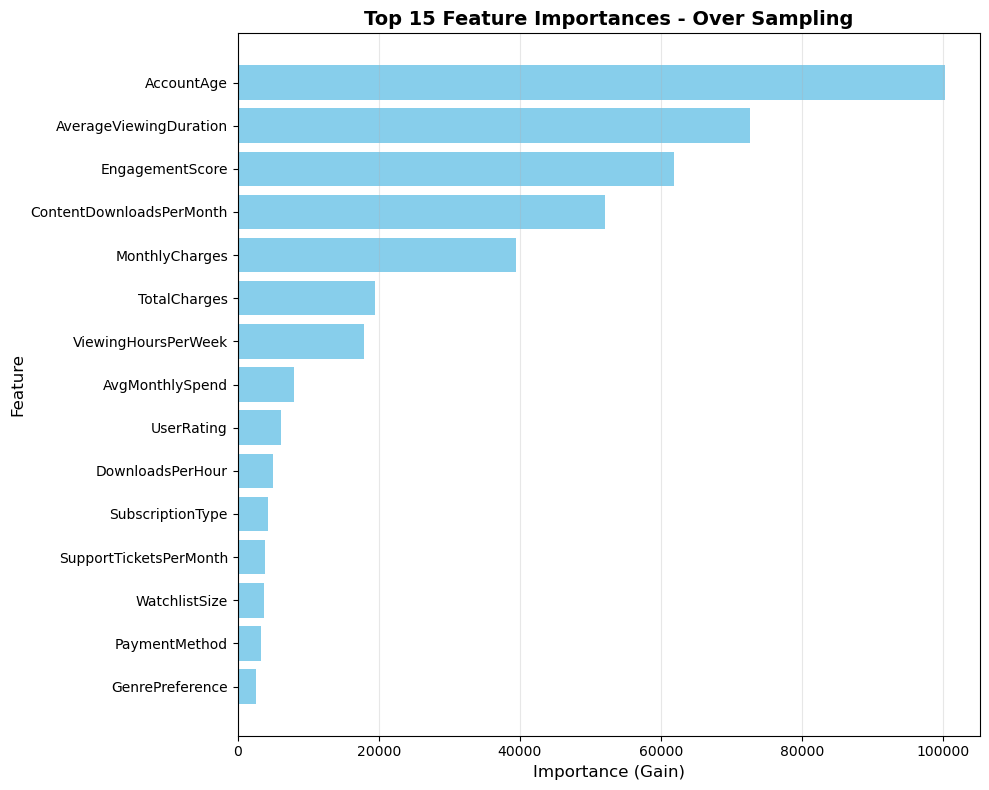


📊 10 features explain 95% of the model's importance


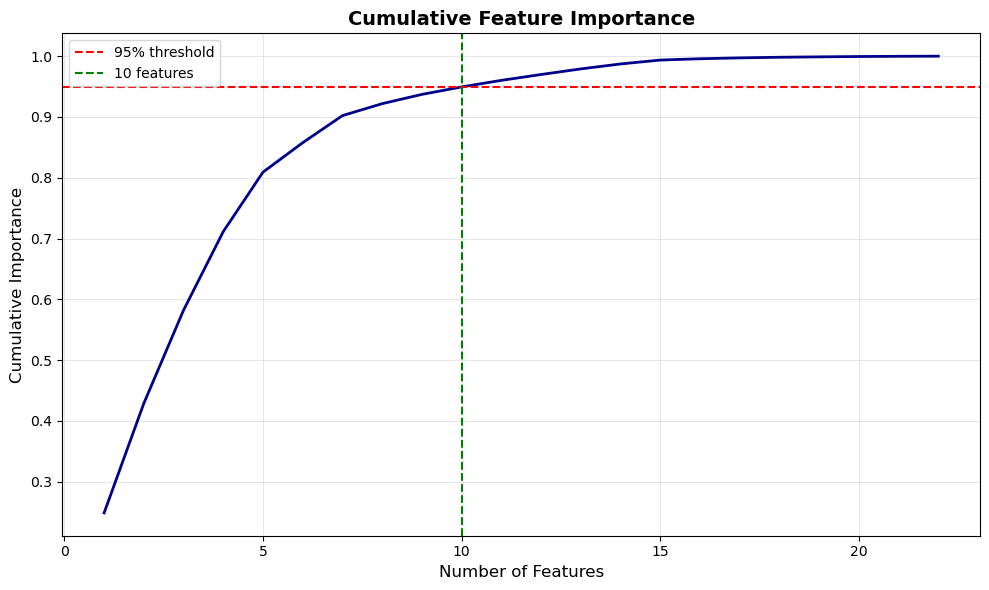

In [18]:
# Analyze feature importance from the best model
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 20 features
print("Top 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

# Visualize top 15 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance (Gain)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title(f'Top 15 Feature Importances - {best_strategy}', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum() / feature_importance['importance'].sum()

# Find how many features explain 95% of importance
n_features_95 = len(feature_importance[feature_importance['cumulative_importance'] <= 0.95])
print(f"\n📊 {n_features_95} features explain 95% of the model's importance")

# Plot cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_importance) + 1), feature_importance['cumulative_importance'], 
         linewidth=2, color='darkblue')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.axvline(x=n_features_95, color='g', linestyle='--', label=f'{n_features_95} features')
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Cumulative Importance', fontsize=12)
plt.title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 7. Make predictions on test set

In [19]:
# Prepare test data and make predictions with optimal model and threshold
test_features = test_df.copy()

# Ensure test features have the same columns as training data
print(f"Test data shape before alignment: {test_features.shape}")
print(f"Training data columns: {len(X.columns)}")

# Check for any missing columns in test
missing_cols = set(X.columns) - set(test_features.columns)
if missing_cols:
    print(f"⚠️ Adding {len(missing_cols)} missing columns to test data: {missing_cols}")
    for col in missing_cols:
        test_features[col] = 0

# Remove any extra columns in test that weren't in training
extra_cols = set(test_features.columns) - set(X.columns)
if extra_cols:
    print(f"⚠️ Removing {len(extra_cols)} extra columns from test data: {extra_cols}")
    test_features = test_features[X.columns]

# Ensure column order matches
test_features = test_features[X.columns]
print(f"Test data shape after alignment: {test_features.shape}")

# Get predictions using the best model and optimal threshold
print(f"\nUsing model: {best_strategy}")
print(f"Using threshold: {best_threshold:.3f}")

# Get probabilities
y_prob_test = model.predict_proba(test_features)[:, 1]

# Apply optimal threshold
y_pred_test = (y_prob_test >= best_threshold).astype(int)

print(f"\nTest predictions completed:")
print(f"  Predicted Churn: {y_pred_test.sum()} ({y_pred_test.sum()/len(y_pred_test)*100:.2f}%)")
print(f"  Predicted No Churn: {(1-y_pred_test).sum()} ({(1-y_pred_test).sum()/len(y_pred_test)*100:.2f}%)")

# Show probability distribution
print(f"\nProbability distribution:")
print(f"  Mean: {y_prob_test.mean():.4f}")
print(f"  Median: {np.median(y_prob_test):.4f}")
print(f"  Std: {y_prob_test.std():.4f}")
print(f"  Min: {y_prob_test.min():.4f}")
print(f"  Max: {y_prob_test.max():.4f}")


Test data shape before alignment: (104480, 23)
Training data columns: 22
⚠️ Removing 1 extra columns from test data: {'CustomerID'}
Test data shape after alignment: (104480, 22)

Using model: Over Sampling
Using threshold: 0.455

Test predictions completed:
  Predicted Churn: 47644 (45.60%)
  Predicted No Churn: 56836 (54.40%)

Probability distribution:
  Mean: 0.4356
  Median: 0.4258
  Std: 0.2079
  Min: 0.0279
  Max: 0.9145


In [20]:
# Create submission file
submission = pd.DataFrame({
    'CustomerID': pd.read_csv("./dataset/test.csv")['CustomerID'],  # Use original CustomerID
    'Predicted_Churn': y_pred_test,
    'Churn_Probability': y_prob_test
})

# Save to CSV
submission.to_csv('submission_lightgbm.csv', index=False)

print("✅ Submission file created: submission_lightgbm.csv")
print(f"\nSubmission preview:")
print(submission.head(10))
print(f"\nSubmission statistics:")
print(submission.describe())


✅ Submission file created: submission_lightgbm.csv

Submission preview:
   CustomerID  Predicted_Churn  Churn_Probability
0  O1W6BHP6RM                0           0.357233
1  LFR4X92X8H                0           0.206622
2  QM5GBIYODA                1           0.727894
3  D9RXTK2K9F                0           0.150832
4  ENTCCHR1LR                1           0.477851
5  7A88BB5IO6                1           0.773331
6  70OMW9XEWR                0           0.388174
7  EL1RMFMPYL                1           0.668606
8  4IA2QPT6ZK                1           0.518473
9  AEDCWHSJDN                1           0.553285

Submission statistics:
       Predicted_Churn  Churn_Probability
count    104480.000000      104480.000000
mean          0.456011           0.435560
std           0.498064           0.207948
min           0.000000           0.027870
25%           0.000000           0.262086
50%           0.000000           0.425819
75%           1.000000           0.601809
max           1.00

# 8. Save model and encoders for future use

In [22]:
# Save the trained model and preprocessing artifacts
import joblib
import json

# Save the LightGBM model
model.booster_.save_model('lightgbm_churn_model.txt')
print("✅ Model saved: lightgbm_churn_model.txt")

# Save label encoders
joblib.dump(encoders, 'label_encoders.pkl')
print("✅ Label encoders saved: label_encoders.pkl")

# Save best threshold and model metadata
model_metadata = {
    'best_threshold': float(best_threshold),
    'best_strategy': best_strategy,
    'validation_metrics': {
        'precision': float(best_row['precision']),
        'recall': float(best_row['recall']),
        'f1': float(best_row['f1']),
        'accuracy': float(best_row['accuracy'])
    },
    'feature_columns': list(X.columns),
    'model_params': best_params_dict[best_strategy]
}

with open('model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)
print("✅ Model metadata saved: model_metadata.json")

print("\n" + "="*60)
print("Model artifacts saved successfully!")
print("="*60)
print("\nTo load and use the model later:")
print("""
import lightgbm as lgb
import joblib
import json

# Load model
model = lgb.Booster(model_file='lightgbm_churn_model.txt')

# Load encoders
encoders = joblib.load('label_encoders.pkl')

# Load metadata
with open('model_metadata.json', 'r') as f:
    metadata = json.load(f)

threshold = metadata['best_threshold']
""")


✅ Model saved: lightgbm_churn_model.txt
✅ Label encoders saved: label_encoders.pkl
✅ Model metadata saved: model_metadata.json

Model artifacts saved successfully!

To load and use the model later:

import lightgbm as lgb
import joblib
import json

# Load model
model = lgb.Booster(model_file='lightgbm_churn_model.txt')

# Load encoders
encoders = joblib.load('label_encoders.pkl')

# Load metadata
with open('model_metadata.json', 'r') as f:
    metadata = json.load(f)

threshold = metadata['best_threshold']

